# 학습 목표
RNN 활용하여 영화 리뷰 감정 분석, 기계 번역 해보기.

일반적인 신경망 구조로는 순서가 주는 정보까지 인식하기 힘들다. -> RNN

# 목차
- RNN 개요
- 영화 리뷰 감정 분석
- Seq2Seq 기계 **변**역
- Seq2Seq 기계 **번**역

### 7.1 RNN 개요

앞선 신경망 모델들이 지니지 못한 결정적인 능력 = **데이터의 순서와 상호작용을 인식하여 전체 상황을 이해**하는 능력

=> **시간**에 대한 개념이 없다.

- 지금까지 공부한 기본신경망, CNN = 사진 = 정적인 데이터
- 현실 경험 = **순차적**

이번 장에서 배울 새로운 신경망은 데이터가 순서대로 나열된 **순차적 데이터** 혹은 **시계열 데이터**의 정보를 받아 전체 내용을 학습하는 **RNN**(=Recurrent Neural Network)

> **시계열 데이터**
> : 일정 시간 간격으로 배치된 데이터들의 수열. (출처: 위키)
>
> ex) 대표적 예시 주식  데이터

> 📌 참고 링크:[시계열 데이터](https://velog.io/@yuns_u/%EC%8B%9C%EA%B3%84%EC%97%B4-%EB%8D%B0%EC%9D%B4%ED%84%B0)
> 
> ~~당장은... 잘 모르겠는데 나중에 다시 보기~~

---

**RNN 기본 구조**
![RNN 기본 구조](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fc7BqeL%2FbtrbVn5v2PJ%2F8IOCyr9nHE2U4eSQoAtkV1%2Fimg.png)
[이미지 출처](https://kingnamji.tistory.com/26)

RNN은 입력응ㄹ 받으면 은닉 벡터를 생성한다. 입력1을 받은 RNN은 은닉 벡터1을 생성하고 출력1을 내보낸다. 입력2가 들어오면 방금의 은닉 벡터1과 입력2를 압축하여 은닉벡터2를 생성하고 이에 대한 결과인 출력2를 내보낸다. 이러한 방식으로 마지막 입력k까지 입력받은 RNN은 모든 입력을 압축하여 은닉 벡터k, 이를 출력한 출력k를 만들어낸다.

시계열 데이터의 길이에 관계없이 입출력을 받아들일 수 있기 때문에 유연하게 구조를 만들 수 있다는 장점이 있다!

![RNN의 구조별 설명](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbAQmwV%2FbtrbVnRYBPD%2FL52CujmWq7V2OkYaQEHNQ1%2Fimg.png)

- 1:1 : 일반적으로 본 신경망, CNN
- 1:多 : 이미지를 보고 이미지 안의 상황을 글로 설명하는 등의 문제
- 多:1 : 순차적인 데이터를 보고 값 **하나**를 내는 경우 ex) 감정 분석
- 多:多 : 순차적인 데이터를 보고 순차적인 데이터를 출력하는 문제 ex) 기계 번역
- 多:多 : 매 프레임을 레이블링할 때 사용되는 구조 ex) 비디오 분류


RNN을 응용한 신경망 형태의 예로는 `LSTM(Long Short Term Memory)`, `GRU(Gated Recurrent Unit` 등이 있고, 이들은 **언어 모델링**, **텍스트 감정 분석**, **기계 번역** 등의 분야에 활용된다.

---

### 7.2 영화 리뷰 감정 분석
RNN을 이용해 텍스트 감정 분석을 해보자!

데이터의 **순서 정보**를 학습한다는 점에서 CIFAR-10 같은 정적 데이터는 잘 안어울린다. **동영상**, **자연어**, **주가** 등 동적인 데이터를 이용할 때 성능 극대화 됨.

이번 예제에서는 가장 기본적인 자연어 처리 작업인 **텍스트 감정 분석**을 해보자!
> **자연어** : 일상적으로 사용하는 말을 프로그래밍 언어와 구분하여 부르는 말

> ✅ 사용할 데이터셋 : IMDB
> 
> : 영화 리뷰 5만 건으로 이루어짐. 각 리뷰는 다수의 영어 문장으로 구성.
> 
> 긍정적 리뷰 : 2 / 부정적 리뷰 : 1 로 레이블링.

![RNN을 이용한 영화 리뷰 감정 분석](https://github.com/kjsoo-1010/pytorch_deeplearning/blob/main/7_RNN_movie_review.png?raw=true)

<br>

> 📌 **토크나이징**과 **워드 임베딩**
> 
> 자연어 텍스트를 인공 신경망에 넣응려면 전처리 과정을 거쳐 데이터를 **숫자**로 나타내야 한다. 가장 먼저 할 일은 문장(Corpus)을 '언어의 최소 단위'인 **토큰**으로 나눠야한다. 토큰의 단위는 상황에 따라 다르지만 보통 의미가 있는 가장 작은 단위로 토큰을 정의한다. 이렇게 토큰으로 나누는 작업을 **토크나이징**이라고 하고, 이 과정에서 어 데이터셋의 모든 단어(토큰) 수만큼의 벡터를 담는 사전이 필요하다.
> 
> 사전에서 해당하는 벡터를 가져오는 작업, 즉 토큰을 벡터 형태로 변환하는 작업을 **워드 임베딩**이라고 한다.

예시
```python
'quick brown for jumps over the lazy dogs.'
```
->
```python
['quick', 'brown', 'for', 'jumps', 'over', 'the', 'lazy','dogs.']
```



> 💡 참고 링크 : [토큰화](https://wikidocs.net/21698)


---

#### 7.2.1 자연어 전처리

In [8]:
# 1. 필수 라이브러리 import
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchtext import data, datasets # 이번엔 자연어 데이터셋이라 torchtext import

# 2. 하이퍼 파라미터 정의
BATCH_SIZE = 64
lr = 0.001
EPOCHS = 40
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

# 3. IMDB 데이터셋 로딩 -> 텐서로 변환
TEXT = data.Field(sequential = True, batch_first = True, lower = True)
LABEL = data.Field(sequential = False, batch_first = True)

> 📌 처음에 에러가 떴다..

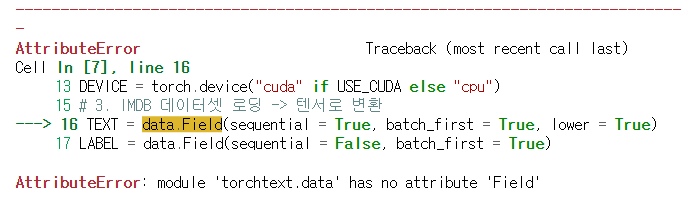 
torchtext 예전 버전에서 사용가능해서 `torchtext.legacy`를 사용하면 된단다.
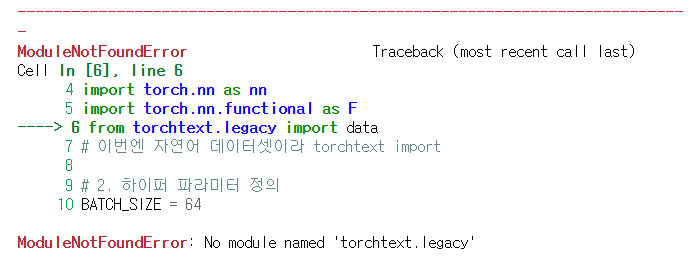

안돼서 찾아보니까 이마저도 이전 버전에서 사용 가능하다고 해서 버전 다운그레이드를 해야한단다...

In [2]:
import torch
import torchtext

print(torch.__version__)
print(torchtext.__version__)

1.12.1+cpu
0.6.0


In [2]:
%pip install pytorch==1.5.0 torchvision==0.6.0 cpuonly -c pytorch

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'pytorch'


해결..~

In [9]:
# 4. datasets 객체의 splits() 함수를 사용해 모델에 입력되는 데이터셋 생성
trainset, testset = datasets.IMDB.splits(TEXT, LABEL)

# 5. 워드 임베딩에 필요한 단어 사전 생성

# 최소 5번 이상 나온 단어만 사전에 넣음
# 5번 미만 출현 단어는 unk(=Unknown) 토큰으로 대체.
TEXT.build_vocab(trainset, min_freq = 5) 
LABEL.build_vocab(trainset)

> 💡 참고 링크: [build_vocab()](https://velog.io/@danbibibi/PyTorch-buildvocab), [워드 임베딩](https://wikidocs.net/64904)


학습 진행도 확인할 검증셋이 부족 -> 2:8로 학습셋 쪼개서 사용.

<br>

batch 단위로 쪼개서 학습 진행 예정이고 반복할 때마다 배치 생성해주는 반복자(iterator) 생성 -> `enumerate()` 함수에 넣어 루프 구현 -> 전체 데이터셋에서 배치 단위의 데이터 생성됨.

In [10]:
# 6. 검증셋 생성, 데이터를 한 번에 처리하기 위한 반복자 구현
trainset, valset = trainset.split(split_ratio = 0.8)
train_iter, val_iter, test_iter = data.BucketIterator.splits(
    (trainset, valset, testset),
    batch_size = BATCH_SIZE,
    shuffle = True, repeat = False
)

> 💡 참고 링크:[BucketIterator()](https://swlock.blogspot.com/2018/09/deep-learning-with-sequence-data-and_15.html), [Field 클래스와 BucketIterator](https://medium.com/@serotoninpm/pytorch-torchtext-field-bucketiterator-728ae511f133)
> - `BucketIterator` : 모든 텍스트 작업을 일괄로 처리하고 단어를 인덱스 숫자로 변환 하는것을 돕는다. Pytorch의 dataloader와 비슷한 역할을 한다. 하지만 dataloader 와 다르게 비슷한 길이의 문장들끼리 batch를 만들기 때문에 padding의 개수를 최소화할 수 있다.
> - `Field` : 데이터셋을 Tensor형태로 바꾸는데 도움을 주는 클래스

In [11]:
# 7. 사전 속 단어들의 개수와 레이블의 수 정해주는 변수 생성
vocab_size = len(TEXT.vocab)
n_classes = 2

In [12]:
# 학습셋, 검증셋, 테스트셋 예제 개수 출력하여 확인해보기
print(f"[학습셋] : {len(trainset)} [검증셋] : {len(valset)} [테스트셋] : {len(testset)}")
print(f"[단어수] : {vocab_size} [클래스] : {n_classes}")

[학습셋] : 20000 [검증셋] : 5000 [테스트셋] : 25000
[단어수] : 46159 [클래스] : 2


#### 7.2.2 RNN 모델 구현

In [1]:
# BasicGRU 라는 RNN을 포함하는 신경망 모델 생성
class BasicGRU(nn.Module):
    def __init__(self, n_layers, hidden_dim, n_vocab, embed_dim,
                n_classes, dropout_p = 0.2):
        super(BasicGRU, self).__init__()
        print("Building Basic GRU model...")
        
        # 은닉 벡터들의 '층'.
        # 아주 복잡한 모델이 아닌 이상 2 이하로 설정.
        self.n_layers = n_layers        
        
        # n_vocab : 사전에 등재된 단어 수
        # embed_dim = 임베딩된 단어 텐서가 지니는 차원값
        self.embed = nn.Embedding(n_vocab, embed_dim)
        
        self.hidden_dim = hidden_dim # 생성되는 은닉 벡터 차원값
        self.dropout = nn.Dropout(dropout_p) # 드롭아웃 정의
        
        # RNN 모델 정의
        self.gru = nn.GRU(embed_dim, self.hidden_dim,
                         num_layers = self.n_layers,
                         batch_first = True)
        
        # 시계열 데이터를 하나의 텐서로 압축 -> 이 리뷰가 긍정적인지 부정적인지 분류.
        self.out = nn.Linear(self.hidden_dim, n_classes)
        
    def forward(self, x):
        # x = 한 배치 속에 있는 모든 영화평 -> 시계열 데이터로 변환
        x = self.embed(x)
        
        # 보통은 여기서 forward() 했겠지만,
        # RNN은 첫번째 은닉 벡터 H0 을 정의해 x와 함께 입력해줘야함.
        h_0 = self._init_state(batch_size = x.size(0))
        
        # 입력 x를 첫번째 은닉벡터와 핳ㅁ께 입력하면 은닉 벡터들이 시계열 배열 형태로 반환.
        x, _ = self.gru(x, h_0) # (batch_size, x길이, hidden_dim) 형태의 3d 텐서
        h_t = x[:, -1, :] # 맨 마지막 출력값
        self.dropout(h_t) # 드롭아웃 설정
        
        logit = self.out(h_t) # 모든 리뷰 압축한 h_t 를 신경망에 넣어 결과 출력
        return logit
        
    # 첫 번째 은닉 벡터 정의하는 함수
    def _init_state(self, batch_size = 1):
        # parameters() : 신경망 모듈의 가중치 정보를 반복자 형태로 반환.
        # 얘가 생성하는 원소들은 실제 신경망의 가중치 텐서를 지닌 객체.
        weight = next(self.parameters()).data # 첫번째 가중치 텐서 추출
        
        # new()로 텐서로 변환 후 zero_()로 텐서 내 모든 값 0으로 초기화
        # -> 첫번째 은닉벡터는 모든 특성값이 0인 벡터로 설정됨.
        return weight.new(self.n_layers, batch_size, self.hidden_dim).zero_()

NameError: name 'nn' is not defined

> 📌 **nn.RNN 이 아닌 nn.GRU 사용하는 이유**
> 
> 딥러닝 모델이 뒤로 갈수록 앞부분 정보가 소실되는데 
> - 기본 RNN : 입력 길어지면 학습 도준 기울기 너무 작아지거나(기울기 소실), 너무 커져서(기울기 폭발) 앞부분에 대한 정보를 정확히 담지 못할 수 있음.
> 
> -> 이를 보완하기 위해 연구한 것 중 대표적인 것이 GRU.
> 
> - GRU : 시계열 데이터 속 벡터 사이의 정보 전달량을 조절하여 기울기를 적절하게 유지시킬 수 있다 -> 문장 앞부분 정보가 끝까지 도달하도록 도와줌.


> 📌 **GRU**
>
> 시계열 데이터 내 정보 전달량 조절하는 **업데이트 게이트** 와 **리셋 게이트** 라는 개념 존재. 
> - 업데이트 게이트 : 이전 은닉 벡터가 지닌 정보를 새로운 은닉 벡터가 얼마나 유지할 지 정해줌.
> - 리셋 게이트 : 새로운 입력이 이전 은닉 벡터와 어떻게 조합되는지 결정.

In [14]:
# 학습 함수 구현
def train(model, optimizer, train_iter):
    model.train()
    for b, batch in enumerate(train_iter):
        x, y = batch.text.to(DEVICE), batch.label.to(DEVICE)
        
        # 라벨값을 보기 쉽게 1/2 에서 0/1로 바꾸기
        y.data.sub_(1)
        
        optimizer.zero_grad() # 기울기 초기화 
        logit = model(x) # 예측값 계산
        
        # 오차 구하고 최적화
        loss = F.cross_entropy(logit, y)
        loss.backward()
        optimizer.step()

In [15]:
# 성능 측정 함수
def evaluate(model, val_iter):
    model.eval()
    corrects, total_loss = 0, 0
    for batch in val_iter:
        x, y = batch.text.to(DEVICE), batch.label.to(DEVICE)
        y.data_sub_(1) # 앞이랑 똑같이 레이블값 0과 1로 바꿔주기
        logit = model(x)
        loss = F.cross_entropy(logit, y, reduction = 'sum')
        total_loss += loss.item()
        corrects += (logit.max(1)[1].view(y.size()).data == y.data).sum()
    size = len(val_iter.dataset)
    avg_loss = total_loss / size
    avg_accuracy = 100.0 * corrects / size
    return avg_loss, avg_accuracy

In [16]:
# 모델 정의

# 은닉벡터 차원값 = 256, 임베딩된 토큰 차원값 = 128
model = BasicGRU(1, 256, vocab_size, 128, n_classes, 0.5).to(DEVICE)

# 최적화 알고리즘 뭐 쓸지 모르겠다 = Adam -> 빠른 학습 속도
optimizer = torch.optim.Adam(model.parameters(), lr = lr)

Building Basic GRU model...


In [17]:
# 학습 실행
best_val_loss = None
for e in range(1, EPOCHS + 1):
    train(model, optimizer, train_iter)
    val_loss, val_accuracy = evaluate(model, val_iter)
    
    print(f"[{e}] 검증 오차: {val_loss:5.2f} | 검증 정확도: {val_accuracy:5.2f}")
    
    # 검증 오차가 최소화된 모델 저장
    if not best_val_loss or val_loss < best_val_loss:
        if not os.path.isdir("snapshot"):
            os.makedirs("snapshot")
        torch.save(model.state_dict(), './snapshot/txtclassificatoion.pt')
        best_val_loss = val_loss

KeyboardInterrupt: 

### 7.3 Seq2Seq 기계 번역
언어를 다른 언어로 해석해주는 **뉴럴 기계 번역**

RNN 기반 번역 모델인 Sequence to Sequence : 시퀀스를 입력받아 또 다른 시퀀스 출력.

대표적인 예로 챗봇과 기계 번역 등이 있다.

일반적으로 기계 번역 모델이 이런 능력을 학습하려면 원문과 번역문이 쌍을 이루는 많은 텍스트 데이터(=병렬 말뭉치)가 많이 필요하고, 강력한 GPU, 복잡한 전처리 과정, 긴 학습 시간 등 많은 리소스가 들지만 이번 예제에서는 간소화하여 맛만 보자!

#### 7.3.1 Seq2Seq 개요
Seq2Seq는 다른 역할(외국어 문장 읽고 의미 이해, 외국어 문장 의미 생각하며 한국어로 작성)을 하는 두 개의 RNN을 이어붙인 모델.

이 두 역할을 각각 인코더와 디코더라는 두 RNN에 부여함으로써 번역한다.

![Seq2Seq 기계 번역 모델](https://wikidocs.net/images/page/24996/%EC%9D%B8%EC%BD%94%EB%8D%94%EB%94%94%EC%BD%94%EB%8D%94%EB%AA%A8%EB%8D%B8.PNG)

[이미지 출처](https://wikidocs.net/24996)

#### 7.3.2 인코더
**인코더** : 원문의 내용을 학습하는 RNN

위 그림에서처럼 원문 속의 모든 단어를 입력 받아 문장 뜻을 내포하는 **하나의 고정 크기 벡터**를 생성한다.

이 벡터는 원문의 뜻과 내용을 압축하고 있다고 해서 **문맥 벡터**라고 한다. 위 그림에서는 'student' 가 입력된 은닉 벡터가 문맥 벡터이다.

> 📌 오토인코더와 RNN 인코더 차이
> 
> 오토인코더는 정보를 **추려내** 차원 수를 줄여주는 것이고, Seq2Seq 모델의 RNN 인코더는 동적인 시계열 데이터를 간단한 형태의 정적인 데이터로 **요약**하는 것이다.

#### 7.3.3 디코더

![RNN 디코더 구조](https://github.com/kjsoo-1010/pytorch_deeplearning/blob/main/7_RNN_docoder_%EA%B5%AC%EC%A1%B0.png?raw=true)
인코더에서 원문 문맥 벡터를 이어받아 번역문 속 토큰을 차례대로 예상한다. 디코더가 예상해낸 모든 토큰과 실제 번역문 사이 오차를 줄여나가는 것이 Seq2Seq 모델이 학습하는 기본 원리이다.

#### 7.3.4 Seq2Seq 모델 구현하기

In [2]:
# 필수 라이브러리 import
import torch
import torch.nn as nn
import random
import matplotlib.pyplot as plt

번역 작업 할 때 보통 **단어**를 문장의 최소 단위로 생각하고 임베딩을 한다. 

이번 예제에서는 영단어 "hello"를 스페인어 'holo'로 번역하기 때문에 워드 임베딩이 아닌 글자 단위의 **캐릭터 임베딩**을 사용한다.

In [4]:
# 데이터셋 속 토큰 종류 수
vocab_size = 256 # 총 아스키 코드 개수

# 번역할 원문과 번역문을 아스키 코드 배열로 정의 -> 파이토치 텐서로 변경
x_ = list(map(ord, "hello"))
y_ = list(map(ord, "hola"))
x = torch.LongTensor(x_)
y = torch.LongTensor(y_)

In [10]:
# 모델 클래스 정의
class Seq2Seq(nn.Module):
    def __init__(self, vocab_size, hidden_size):
        super(Seq2Seq, self).__init__()
        self.n_layers= 1 # 은닉 벡터 층
        self.hidden_size = hidden_size # 생성되는 은닉 벡터 차원값
        
        # 임베딩 함수 정의
        # 임베딩 차원 값 따로 안 정하고 hidden_size를 임베딩된 토큰의 차원값으로 정의
        # 실전에서는 원문과 번역문의 문자 체계가 완전 다른 경우를 대비해,
        # 원문용 임베딩과 번역문용 임베딩 따로 만들어야함.
        # 지금은 그냥 둘다 아스키 코드로 나타내기 때문에 하나만 만들어줘도 무방.
        self.embedding = nn.Embedding(vocab_size, hidden_size)
        self.encoder = nn.GRU(hidden_size, hidden_size)
        self.decoder = nn.GRU(hidden_size, hidden_size)
        
        # 디코더가 번역문의 다음 토큰 예상해내는 작은 신경망 하나 더 생성
        self.project = nn.Linear(hidden_size, vocab_size)
        
        
    def forward(self, inputs, targets):
        initial_state = self._init_state() # 첫 번째 은닉 벡터
        embedding = self.embedding(inputs).unsqueeze(1) # hello를 구성하는 모든 문자 임베딩
        
        # encoder_state = 문맥 벡터 / decoder_state = 디코더의 첫 번째 은닉 벡터
        encoder_output, encoder_state = self.encoder(embedding, initial_state)
        decoder_state = encoder_state
        decoder_input = torch.LongTensor([0])
        
        # 디코더는 문장 시작 토큰인 아스키 코드 0번을 이용하여 "hola"의 "h" 토큰을 예측.
        # 다음 반복에서는 'h'를 이용해 'o'를 예측해야함. -> for문으로 구현
        outputs = []
        for i in range(targets.size()[0]):
            # 첫 번째 토큰과 인코더 문맥 벡터 동시에 입력 받음.
            decoder_input = self.embedding(decoder_input).unsqueeze(1)
            decoder_output, decoder_state = self.decoder(decoder_input, decoder_state)
            
            # 결과값 다시 입력하고, 출력값이 마지막 마지막 층인 Softmax 층 거치면
            # 번역문 다음 예상 글자가 나온다.
            # 예상 결과 outputs 텐서에 저장해 오차 계산할 때 사용.
            projection = self.project(decoder_output)
            outputs.append(projection)
            
            # 티처 포싱을 이용한 디코더 입력 갱신
            decoder_input = torch.LongTensor([targets[i]])
            
        # outputs = 모든 토큰에 대한 결과값들의 배열
        outputs = torch.stack(outputs).squeeze()
        return outputs
        
        
    # 첫 번째 은닉 벡터 정의하는 함수
    def _init_state(self, batch_size = 1):
        # parameters() : 신경망 모듈의 가중치 정보를 반복자 형태로 반환
        # 얘가 생성하는 원소들은 실제 신경망의 가중치 텐서를 지닌 객체.
        weight = next(self.parameters()).data # 첫 번째 가중치 텐서 추출
        
        # new() 함수 사용해 텐서로 변환 후, zero_()로 텐서 내 모든 값 0으로 초기화
        # 첫 번째 은닉벡터는 모든 특성값이 0인 벡터로 설정됨.
        return weight.new(self.n_layers, batch_size, self.hidden_size).zero_()

![RNN 디코더 구조](https://github.com/kjsoo-1010/pytorch_deeplearning/blob/main/7_RNN_decoder.png?raw=true)

디코더가 번역문의 첫 번째 토큰을 예상하려면, 인코더의 **문맥 벡터**와 **문장 시작 토큰**을 입력 데이터로 받아야한다.
- **입력 시작 토큰** : 실제 문장에는 나타나지 않지만, 디코더가 정상적으로 작동할 수 있도록 인위적으로 넣은 토큰. 말 그대로 디코더에 문장의 시작을 알리기 위함이며, 아스키값으로 공백 문자(null)을 뜻하는 0으로 설정.

seq2seq 모델은 디코더가 예측한 토큰을 다음 반복에서 입력될 토큰으로 갱신해주는 것이 정석이다. 하지만 학스이 아직 되지 않은 상태의 모델은 잘못된 예측 토큰을 입력으로 사용할 확률이 높다. 잘못된 토큰이 사용되면 학습이 더뎌진다.

이를 방지하기 위한 방법 중 대표적인 것이 **티처 포싱(teacher forcing)** 이다.

- **티처 포싱** : 디코더 학습 시 **실제 번역문의 토큰**을 디코더의 전 출력값 대신 입력으로 사용해 학습을 가속하는 방법.


In [11]:
# 오차 함수와 최적화 알고리즘 정의
seq2seq = Seq2Seq(vocab_size, 16)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(seq2seq.parameters(), lr = 1e-3)

In [12]:
# 모델 학습 Epoch = 1000
log = []
for i in range(1000):
    prediction = seq2seq(x, y)
    loss = criterion(prediction, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_val = loss.data
    log.append(loss_val)
    
    if i % 100 == 0:
        print(f"\n 반복:{i} 오차:{loss_val.item()}")
        _, top1 = prediction.data.topk(1, 1)
        print([chr(c) for c in top1.squeeze().numpy().tolist()])


 반복:0 오차:5.719714164733887
['ú', '>', '{', "'"]

 반복:100 오차:2.03080677986145
['h', 'l', 'l', 'l']

 반복:200 오차:0.5871451497077942
['h', 'o', 'l', 'a']

 반복:300 오차:0.30315762758255005
['h', 'o', 'l', 'a']

 반복:400 오차:0.20184971392154694
['h', 'o', 'l', 'a']

 반복:500 오차:0.14708589017391205
['h', 'o', 'l', 'a']

 반복:600 오차:0.11225750297307968
['h', 'o', 'l', 'a']

 반복:700 오차:0.0890098288655281
['h', 'o', 'l', 'a']

 반복:800 오차:0.07269123941659927
['h', 'o', 'l', 'a']

 반복:900 오차:0.06066729128360748
['h', 'o', 'l', 'a']


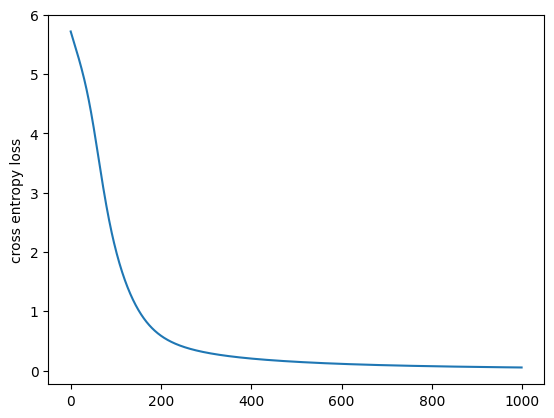

In [13]:
# 오차 시각화
plt.plot(log)
plt.ylabel("cross entropy loss")
plt.show()